<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0624/blob/main/1_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
# pandas兩種型態: DataFrame(2D) Series(1D)
datas = pd.DataFrame(iris["data"], columns=iris["feature_names"])
datas["ans"] = iris["target"]
datas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 資料多寡

看問題難度決定(x欄位的多寡/y的種類)
1. 機器學習: 幾千筆~幾萬筆
2. 深度學習: 萬筆~幾十萬筆

In [31]:
# pandas操作: drop(注意axis 0or1 橫或直)
# test = pd.DataFrame([
#   [0, 1],
#   [2, 3]
# ], columns=["a", "b"], index=["a", "b"])
# test.drop("a", axis=1)
x = datas.drop("ans", axis=1)
y = datas["ans"]

In [32]:
from sklearn.model_selection import train_test_split
# ctrl + "/": 多行註解
# Demo
# train_test_split([1, 2, 3, 4],
#          [5, 6, 7, 8],
#          [9, 10, 11, 12],
#          test_size=0.25)
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 135\nvalue = [44, 46, 45]\nclass = versicolor'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 91\nvalue = [0, 46, 45]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.15\nsamples = 49\nvalue = [0, 45, 4]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.046\nsamples = 42\nvalue = [0, 1, 41]\nclass = virginica')]

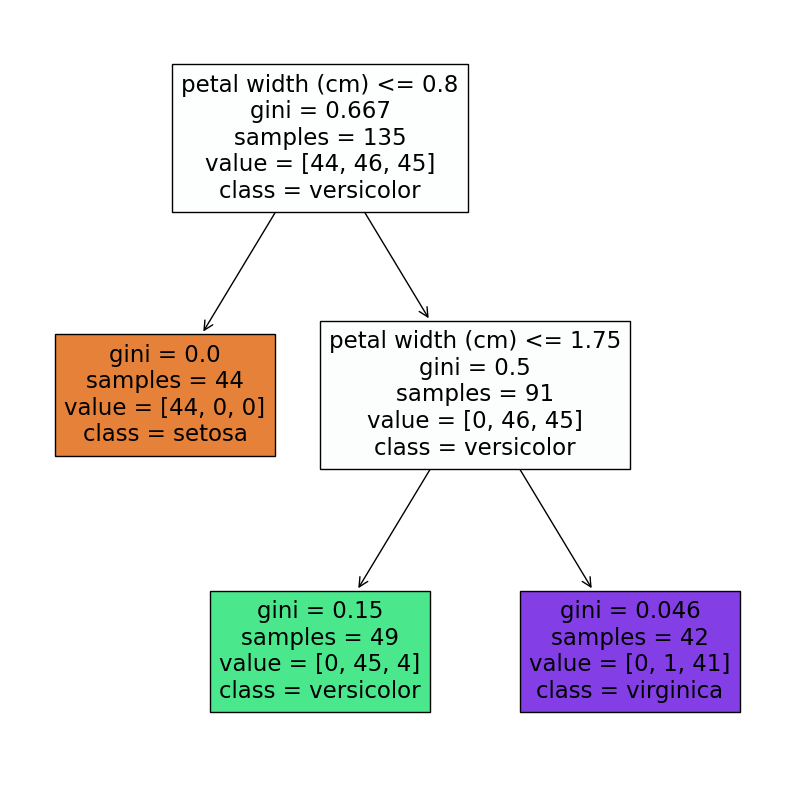

In [37]:
# matplotlib: 所有繪圖基礎
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[10, 10])
plot_tree(clf,
     feature_names=iris["feature_names"],
     class_names=iris["target_names"],
     filled=True)

In [38]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

0.9333333333333333